In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [ ]:
files = list()
for _, _, files in os.walk('/content/drive/MyDrive/CP1/HAD_A1_UC10_S1/front_image'):
  files.append(files)
  # print(files)

# for img_name in files.split()[0]:
#   print(img_name)

files = files[:-1]

len(files)

69

In [ ]:
filenames = list()

for img_num in files:
  filenames.append(img_num.split('.')[0])

filenames

['000012',
 '000015',
 '000014',
 '000000',
 '000011',
 '000002',
 '000007',
 '000009',
 '000001',
 '000005',
 '000013',
 '000003',
 '000004',
 '000008',
 '000010',
 '000006',
 '000017',
 '000024',
 '000040',
 '000041',
 '000027',
 '000030',
 '000038',
 '000043',
 '000025',
 '000032',
 '000021',
 '000019',
 '000020',
 '000028',
 '000031',
 '000039',
 '000022',
 '000035',
 '000018',
 '000036',
 '000034',
 '000016',
 '000037',
 '000033',
 '000029',
 '000026',
 '000023',
 '000042',
 '000059',
 '000058',
 '000051',
 '000046',
 '000067',
 '000052',
 '000050',
 '000068',
 '000061',
 '000044',
 '000060',
 '000062',
 '000056',
 '000055',
 '000047',
 '000048',
 '000064',
 '000049',
 '000063',
 '000053',
 '000045',
 '000065',
 '000057',
 '000054',
 '000066']

In [ ]:
plt.rcParams['figure.dpi'] = 144

IMAGE :  000012
IMAGE :  000015
IMAGE :  000014
IMAGE :  000000
IMAGE :  000011


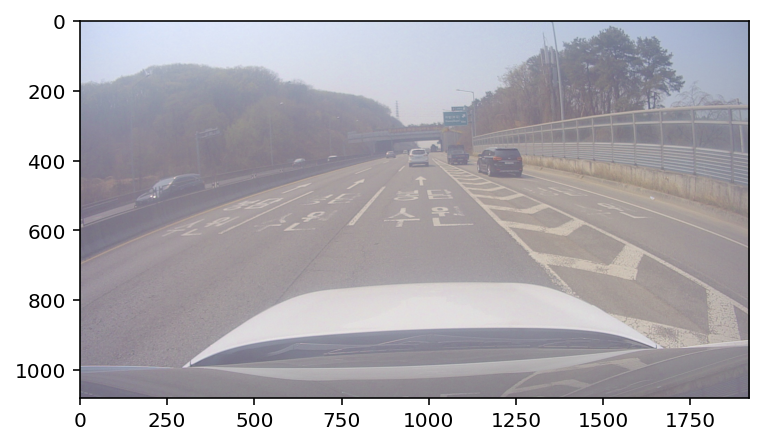

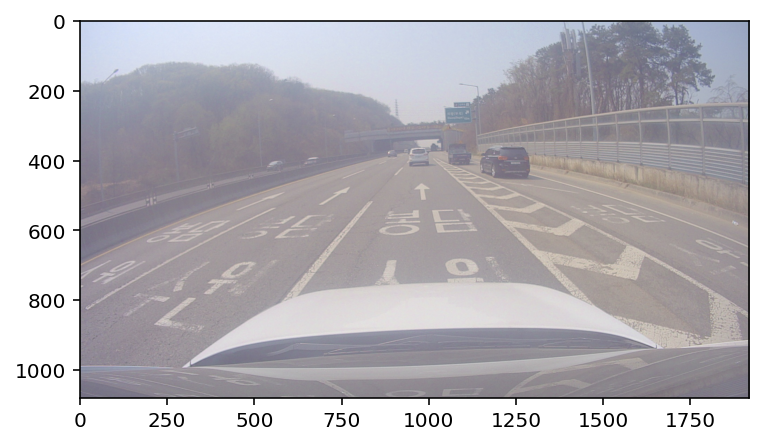

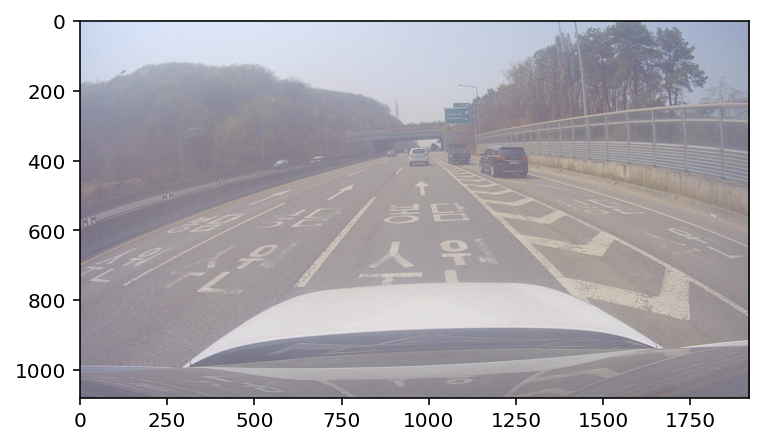

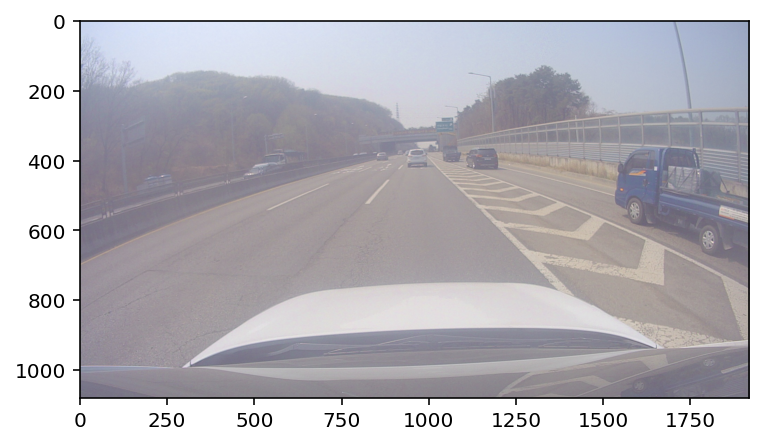

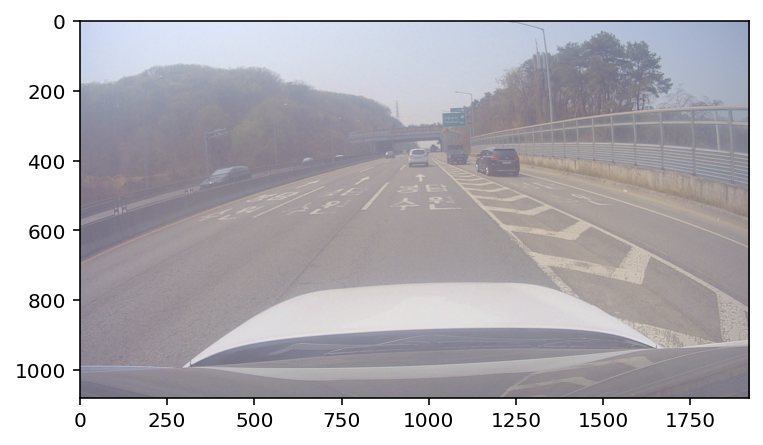

In [ ]:
FILEPATH = '/content/drive/MyDrive/CP1/HAD_A1_UC10_S1/'
IMG = 'front_image/'
ANNOT = 'front_meta/'

for filename in filenames[0:5]:
  img = plt.imread(FILEPATH + IMG + filename + '.jpg')

  print("IMAGE : ", filename)
  plt.figure()
  plt.imshow(img)

In [ ]:
def get_bbox(filename):
  FILEPATH = f'/content/drive/MyDrive/CP1/HAD_A1_UC10_S1/front_meta/{filename}.json'
  with open(FILEPATH, 'r') as f:
    json_data = json.load(f)

  annot_3d = json_data['OBJECT_LIST'][0]['3D_LIST']

  boxes = list()

  for member in annot_3d:
    box = list(map(float, member['BOX']))

    boxes.append(box)

  return np.array(boxes)

In [ ]:
labels = dict()

for filename in filenames:
  labels[filename] = get_bbox(filename)

labels

{'000000': array([[1528.,  356., 1920.,  675.],
        [1105.,  359., 1200.,  429.],
        [ 522.,  365.,  655.,  413.],
        [1038.,  353., 1095.,  406.],
        [ 930.,  363.,  999.,  422.],
        [ 462.,  400.,  581.,  463.],
        [ 844.,  370.,  886.,  405.],
        [ 907.,  369.,  928.,  385.],
        [ 929.,  368.,  947.,  388.]]),
 '000001': array([[1570.,  357., 1920.,  711.],
        [1105.,  360., 1205.,  430.],
        [ 443.,  370.,  599.,  456.],
        [1038.,  352., 1095.,  407.],
        [ 932.,  366.,  997.,  420.],
        [ 304.,  416.,  470.,  504.],
        [ 848.,  371.,  889.,  404.],
        [ 907.,  370.,  928.,  386.],
        [ 931.,  370.,  946.,  387.]]),
 '000002': array([[1592.,  360., 1920.,  727.],
        [1108.,  359., 1209.,  428.],
        [ 223.,  433.,  400.,  518.],
        [ 409.,  370.,  577.,  466.],
        [1036.,  353., 1097.,  405.],
        [ 930.,  365.,  996.,  421.],
        [ 851.,  372.,  890.,  402.],
        [ 909., 

In [ ]:
def get_img_bbox(img_path, meta_path):
  img = cv.imread(img_path)
  img = Image.fromarray(img)

  with open(meta_path, 'r') as f:
    json_data = json.load(f)

  # annot_2d = json_data['OBJECT_LIST'][0]['2D_LIST']
  annot_3d = json_data['OBJECT_LIST'][0]['3D_LIST']

  lane_boxes = list()
  lane_labels = list()
  boxes = list()
  labels = list()

  # for member in annot_2d:
  #   if 'BOX' in member:
  #     label = member['CLASS'] + '_' + member['TYPE']
  #     box = member['BOX']

  #     boxes.append(box)
  #     labels.append(label)


  for member in annot_3d:
    label = member['CLASS']
    box = member['BOX']

    boxes.append(box)
    labels.append(label)

  return img, boxes, labels

In [ ]:
def draw_on_image(img_path, meta_path):
    img, boxes, labels = get_img_bbox(img_path, meta_path)
    draw = ImageDraw.Draw(img)

    for box, label in zip(boxes, labels):
        draw = ImageDraw.Draw(img)
        x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
        draw.rectangle(xy=((x1,y1),(x2,y2)))
        draw.text((x1, y1), label, fill=(255, 0, 0)) 
    return img

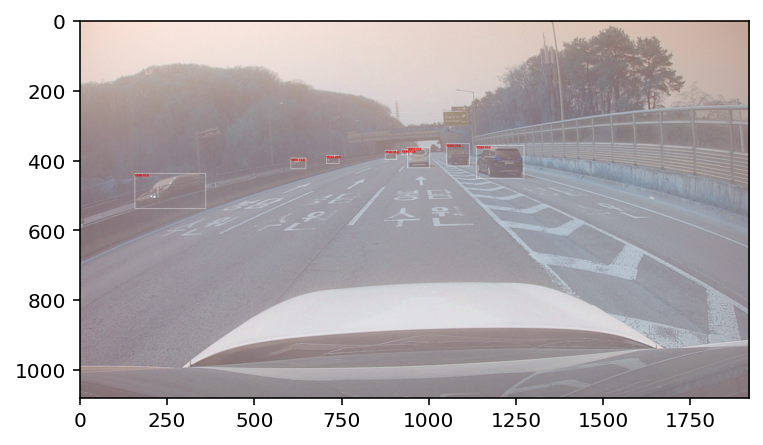

In [ ]:
import cv2 as cv

plt.rcParams['figure.dpi'] = 144

for name in img_names[0:1]:
  img_path = FILEPATH + IMG + name + '.jpg'
  meta_path = FILEPATH + ANNOT + name + '.json'

  img = draw_on_image(img_path, meta_path)

  plt.figure()
  plt.imshow(img)

In [ ]:
img.size

(1920, 1080)

In [ ]:
sss = cv.ximgproc.segmentation.createSelectiveSearchSegmentation()

Shape :  (224, 224, 3)
Possible Bounty Boxes :  345


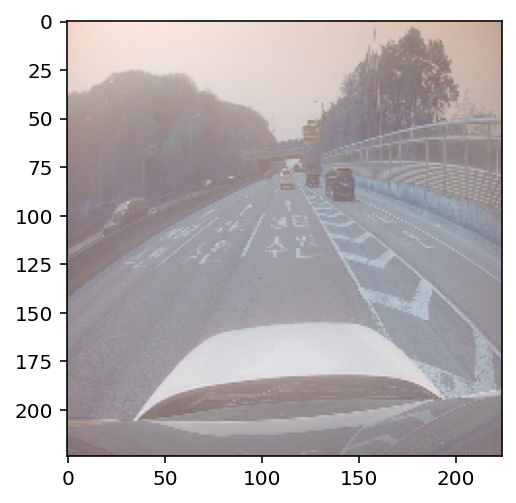

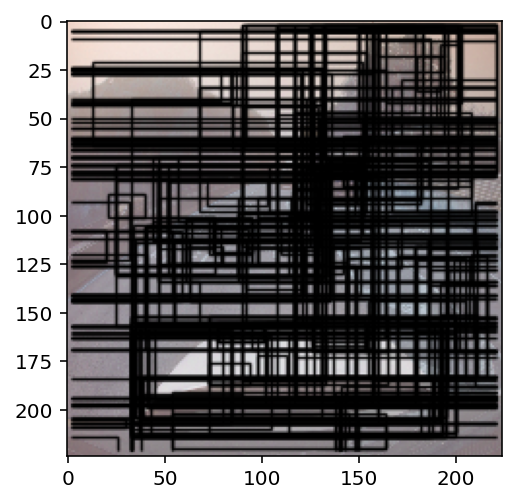

In [ ]:
img = cv.imread(FILEPATH + IMG + '000012' + '.jpg')
img = cv.resize(img, (224, 224))

plt.figure()
plt.imshow(img);

sss.setBaseImage(img)
sss.switchToSelectiveSearchFast()

rects = sss.process()

print('Shape : ', img.shape)
print('Possible Bounty Boxes : ', len(rects))

for rect in rects:
  x, y, w, h = rect

  imgOut = cv.rectangle(img, (x,y), (x+w, y+h), (0, 0, 0), 1, cv.LINE_AA)

plt.figure()
plt.imshow(imgOut);

In [ ]:
def get_iou(bbox1, bbox2):
  assert bbox1['x1'] < bbox1['x2']
  assert bbox1['y1'] < bbox1['y2']

  assert bbox2['x1'] < bbox2['x2']
  assert bbox2['y1'] < bbox2['y2']

  x_left = max(bbox1['x1'], bbox2['x1'])
  y_top = max(bbox1['y1'], bbox2['y1'])
  x_right = min(bbox1['x2'], bbox2['x2'])
  y_bottom = min(bbox1['y2'], bbox2['y2'])

  if x_right < x_left or y_bottom < y_top:
    return 0.0

  intersection_area = (x_right - x_left) * (y_bottom - y_top)
  bb1_area = (bbox1['x2'] - bbox1['x1']) * (bbox1['y2'] - bbox1['y1'])
  bb2_area = (bbox2['x2'] - bbox2['x1']) * (bbox2['y2'] - bbox2['y1'])
  iou = intersection_area / float(bb1_area + bb2_area - intersection_area)

  assert iou >= 0.0
  assert iou <= 1.0

  return iou

In [ ]:
image_list = list()
k=0
l=0
z=0

for name in img_names[0:1]:

  img_path = FILEPATH + IMG + name + '.jpg'
  meta_path = FILEPATH + ANNOT + name + '.json'

  _, boxes, _ = get_img_bbox(img_path, meta_path)

  for bbox in boxes:
    bb1 = {
        'x1':int(bbox[0]),
        'y1':int(bbox[1]),
        'x2':int(bbox[2]),
        'y2':int(bbox[3])
        }

    try:
      img = cv.imread(img_path)
      img = cv.resize(img, (640, 360))
      sss.setBaseImage(img)
      sss.switchToSelectiveSearchFast()
      rects = sss.process()

      for i in rects:
        x, y, w, h = i
        bb2 = {
            'x1' : x,
            'y1' : y,
            'x2' : x+w,
            'y2' : y+h
            }

        img1 = img[bb2['y1'] : bb2['y2'], bb2['x1'] : bb2['x2']]

        img1_shape = cv.resize(img1,(640, 360))

        if k < 1:
          if 0.5 < get_iou(bb1, bb2):
            image_list.append([img1_shape, 1])
            k += 1
        
        else:
          if 0.5 < get_iou(bb1, bb2):
            image_list.append([img1_shape, 1])
            k += 1

          else:
            image_list.append([img1_shape, 0])
            l += 1

    except Exception as e:
      print('hata var', e)

    z += 1

    print(name, z, len(rects))


000012 1 2270
000012 2 2270
000012 3 2270
000012 4 2270
000012 5 2270
000012 6 2270
000012 7 2270
000012 8 2270


In [ ]:
len(image_list)

13593

In [ ]:
data=[]
data_label=[]
for features,label in image_list:
  data.append(features)
  data_label.append(label)

Class: 0
Image_Size: (224, 224, 3)


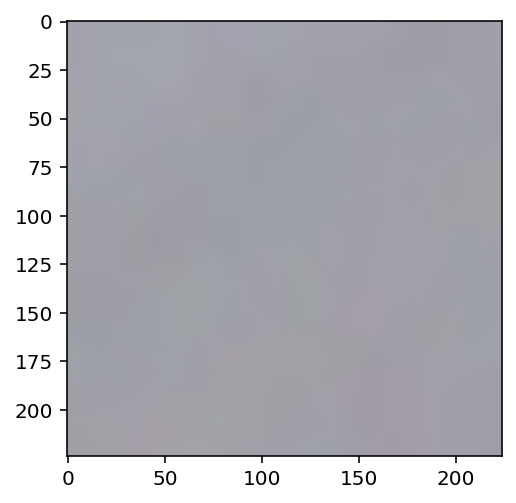

In [ ]:
import random

i=random.randint(1,32951)
print('Class:',data_label[i])
print('Image_Size:',data[i].shape)
plt.imshow(data[i]);

In [ ]:
idx_list = list()
for idx, classi in enumerate(data_label):
  if classi == 1:
    idx_list.append(idx)

len(idx_list)

19

Class: 1
Image_Size: (224, 224, 3)


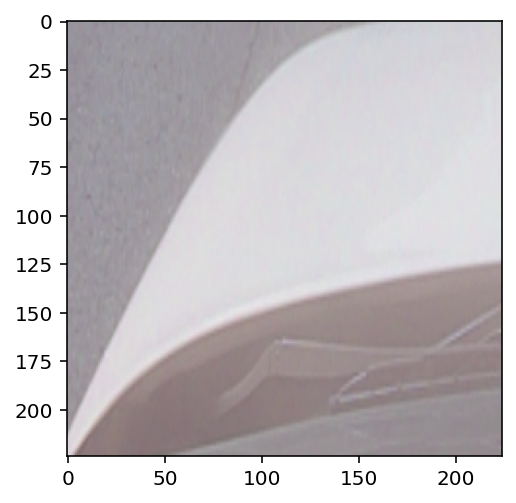

In [ ]:
i = idx_list[13]
print('Class:',data_label[i])
print('Image_Size:',data[i].shape)
plt.imshow(data[i]);